# SYED MUHAMMAD ZAIN ASSIGNMENT 1 Computer Vision Canny Edge
# Reg No: 329876 SECTION:MSEE Signal Processing NUST 2k20

# Orignal Image and Step 1 gaussian Blurring

In [1]:
#importing libraries
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Regarding Reading Change the directory and add , 0 to convert to grayscale

In [2]:
#reading image that is converted to grayscale automatically using ,0
image_original=cv2.imread('E:\\downloads\\image3.jpg',0)


Text(0.5, 1.0, 'original image in grayscale')

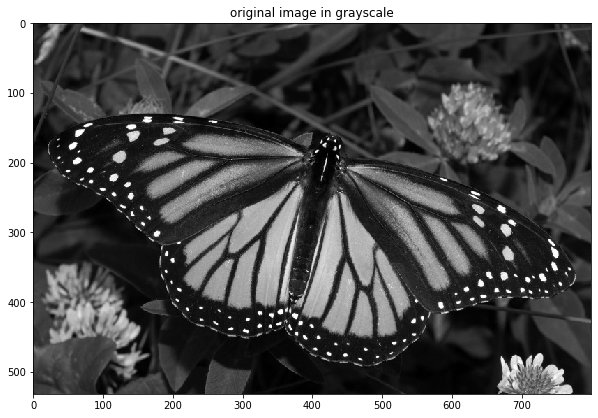

In [3]:
#plotting grayscale image
plt.figure(figsize=(10,10))
plt.imshow(image_original,cmap='gray')
plt.title('original image in grayscale')

In [4]:
#Blurring the original image with a 7x7 kernel and sigma value= 3
GaussianB=cv2.GaussianBlur(image_original,(7,7),3)

Text(0.5, 1.0, 'Blurred Image gaussian')

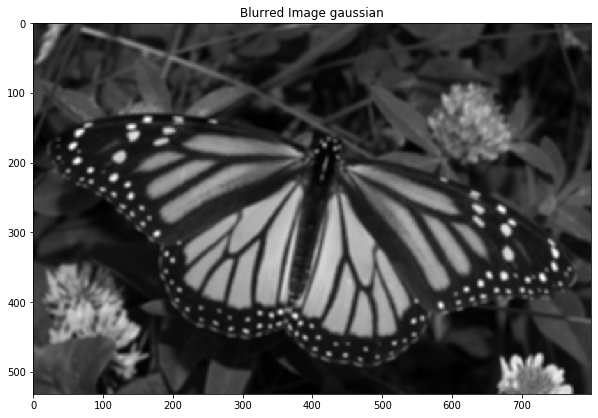

In [5]:
#plotting the blurred image 
plt.figure(figsize=(10,10))
plt.imshow(GaussianB,cmap='gray')
plt.title('Blurred Image gaussian')

# Step 2 Finding the Gradient of Gaussian Gradient Vector angle and magnitude

In [6]:
image_original.shape # height,weight,3 channel

(532, 800)

In [7]:
#creating a kernel 3x3 for the sobel operator
#both x and y directions 
kernelx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
kernely = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernelx=kernelx.T
kernely=kernely.T

In [8]:
#convulving with the sobel operator to obtain the derivative of gaussian 
#it is converted to floating point 64
gx1= cv2.filter2D(GaussianB,cv2.CV_64F,kernelx)
gy1= cv2.filter2D(GaussianB,cv2.CV_64F,kernely)

In [9]:
#performing preprocessing and converting back to floating point 8 optional step
gx2=np.absolute(gx1)
gx3=gx2/gx2.max()*255
gx=np.uint8(gx3)

In [10]:
#performing preprocessing and converting back to floating point 8
gy2=np.absolute(gy1)
gy3=gy2/gy2.max()*255
gy=np.uint8(gy3)

Text(0.5, 1.0, 'gradient in x direction')

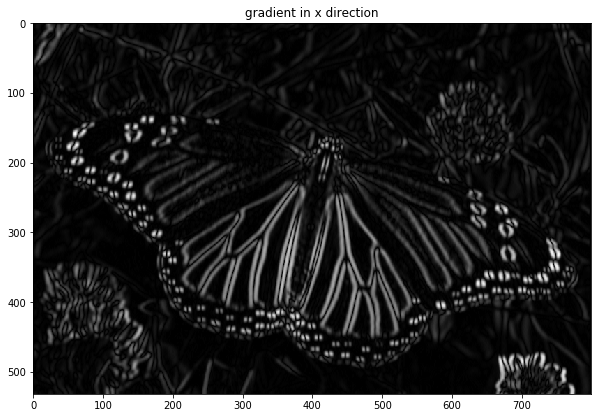

In [11]:
#plotting in the gradient in x direction
plt.figure(figsize=(10,10))
plt.imshow(gx,cmap='gray')
plt.title('gradient in x direction')

Text(0.5, 1.0, 'gradient in y direction')

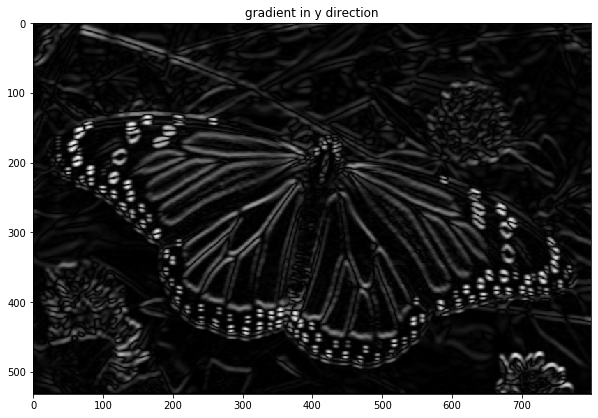

In [12]:
#plotting the gradient in the y direction
plt.figure(figsize=(10,10))
plt.imshow(gy,cmap='gray')
plt.title('gradient in y direction')

In [13]:
#finding the magnitude using the gradients and converting it to floating point 8
magnitude = np.hypot(gx, gy)
magnitude = magnitude/magnitude.max()*255
magnitude = np.uint8(magnitude)

In [14]:
#finding the angle and converting it to degrees as the function is orignally in radians
Ainradians = np.arctan2(gy1, gx1)
Aindegrees = np.rad2deg(Ainradians)

In [15]:
Aindegrees

array([[   0.        ,    0.        ,  180.        , ...,    0.        ,
           0.        ,    0.        ],
       [ -90.        ,  -90.        , -135.        , ...,   78.69006753,
          90.        ,   90.        ],
       [ -90.        ,  -90.        , -119.0546041 , ...,   84.80557109,
          90.        ,   90.        ],
       ...,
       [ -90.        ,  -61.69924423,  -39.80557109, ...,  -50.71059314,
         -71.56505118,  -90.        ],
       [ -90.        ,  -45.        ,  -25.01689348, ...,  -45.        ,
         -63.43494882,  -90.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

Text(0.5, 1.0, 'magnitude of the gradient')

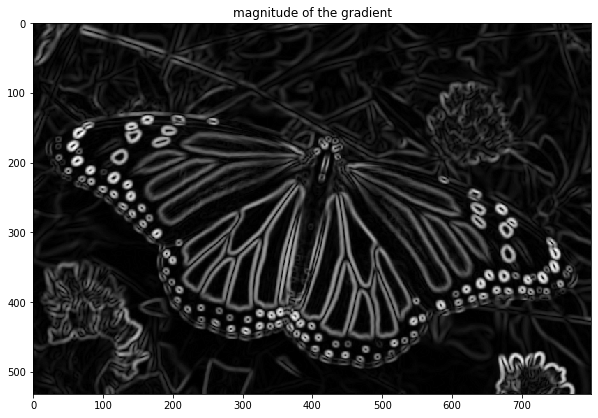

In [16]:
#plotting the magnitude of the gradient
plt.figure(figsize=(10,10))
plt.imshow(magnitude,cmap='gray')
plt.title('magnitude of the gradient')

In [17]:
magnitude.shape

(532, 800)

# STEP 3 Non maximum supression

In [18]:
#extraction of height and width for looping
#creating NMS_method which is empty array of the same size as magnitude
height, width = magnitude.shape
NMS_method= np.zeros((height,width), dtype= np.uint8)

In [19]:
#looping through all the pixel values of the image and assignment of values to the two neighbours in each direction
#there are 8 directions and we find the two neighbours in each direction
#but first we discretize the directions into 4 directions check neighbours in the direction
for c1 in range(1,height-1):
    for c2 in range(1,width-1):
       # discrete 0 angle
        if (0 <= Aindegrees[c1,c2] < 22.5) or (157.5 <= Aindegrees[c1,c2] <= 180) or (-22.5 <= Aindegrees[c1,c2] < 0) or (-180 <= Aindegrees[c1,c2] < -157.5):
            neighbour1 = magnitude[c1, c2+1]
            neighbour2 = magnitude[c1, c2-1]
        # discrete 45 angle
        elif (22.5 <= Aindegrees[c1,c2] < 67.5) or (-157.5 <= Aindegrees[c1,c2] < -112.5):
            neighbour1 = magnitude[c1+1, c2+1]
            neighbour2 = magnitude[c1-1, c2-1]
        # discrete 90 angle
        elif (67.5 <= Aindegrees[c1,c2]< 112.5) or (-112.5 <= Aindegrees[c1,c2] < -67.5):
            neighbour1 = magnitude[c1+1, c2]
            neighbour2=  magnitude[c1-1, c2]
        # discrete 135 angle
        elif (112.5 <= Aindegrees[c1,c2] < 157.5) or (-67.5 <= Aindegrees[c1,c2] < -22.5):
            neighbour1 = magnitude[c1+1, c2-1]
            neighbour2 = magnitude[c1-1, c2+1]
         # Saving results in the NMS_method if the magnitude is greater than both neighbours
        # if the pixel value is at maximum it will be saved other wise it will removed i.e set to 0 value
        if (magnitude[c1,c2] >= neighbour1) and (magnitude[c1,c2] >= neighbour2):
            NMS_method[c1,c2] = magnitude[c1,c2]
        else:
            NMS_method[c1,c2] = 0

Text(0.5, 1.0, 'non maximum supression method')

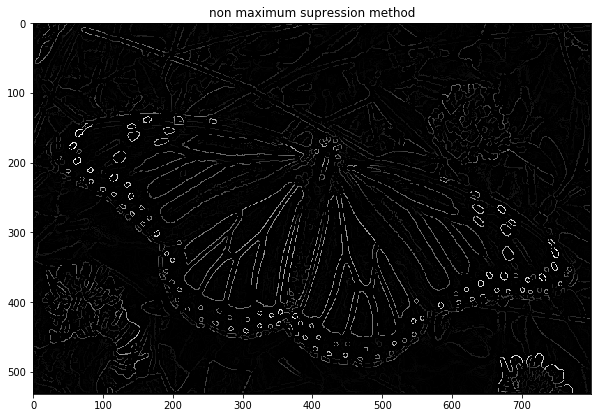

In [20]:
#plotting the non maximum supression method
plt.figure(figsize=(10,10))
plt.imshow(NMS_method,cmap='gray')
plt.title('non maximum supression method')

# Step 4 Hysteresis Thresholding

In [21]:
maxvalue=NMS_method.max()#maximum value for thresholding purposes

In [22]:
#finding higher than threshold values lower than low threshold values and medium values which are gray
HT=round(maxvalue/12.14)#21
LT=round(maxvalue/17)#15
height1, width1 = NMS_method.shape
double_thresh = np.zeros((height1,width1), dtype= np.uint8)
whiteh, whitew = np.where(NMS_method >= HT)
blackh, blackw = np.where(NMS_method < LT)
grayh, grayw = np.where((NMS_method <= HT) & (NMS_method >= LT))

In [23]:
#assignment of the white values as 255 # assignment of gray values as 75 and assignment of blackvalues 0
#white values are the strong edges # gray values are the weak and black are too weak to be considered they are turned black
double_thresh[whiteh, whitew] = 255
double_thresh[blackh, blackw ] = 0
double_thresh[grayh, grayw] = 75

Text(0.5, 1.0, 'double thresholding')

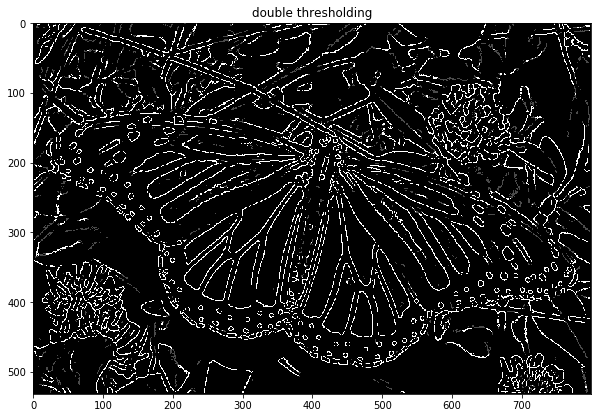

In [24]:
#plotting the double thresholded image
plt.figure(figsize=(10,10))
plt.imshow(double_thresh,cmap='gray')
plt.title('double thresholding')

In [25]:
finalcanny=double_thresh#saving the double thresh in a new location final canny

In [26]:
#checking the double threshold gray values
# we only consider the weak edges which are gray ones we only consider them if 255 if strong edge is in the vicinity
#other wise we suppress the gray edge to 0
# this removes the gray portion in double thresholding
height2, width2 = finalcanny.shape
for c1 in range(1, height2-1):
    for c2 in range(1, width2-1):
        if (finalcanny[c1,c2] == 75):
            if 255 in [finalcanny[c1+1, c2-1],finalcanny[c1+1, c2],finalcanny[c1+1, c2+1],finalcanny[c1, c2-1],finalcanny[c1, c2+1],finalcanny[c1-1, c2-1],finalcanny[c1-1, c2],finalcanny[c1-1, c2+1]]:
                finalcanny[c1, c2] = 255
            else:
                finalcanny[c1, c2] = 0

Text(0.5, 1.0, 'Final output the canny edge detector')

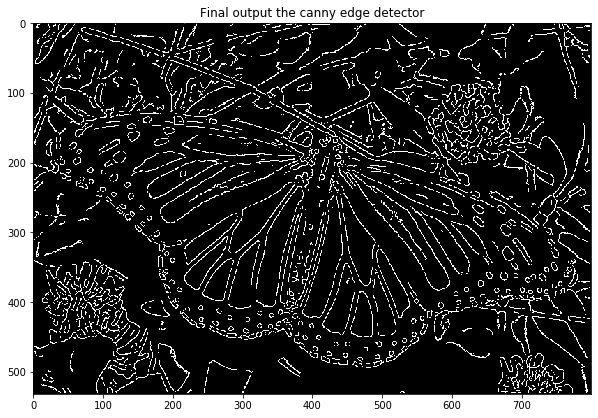

In [27]:
#plotting the final output
plt.figure(figsize=(10,10))
plt.imshow(finalcanny,cmap='gray')
plt.title('Final output the canny edge detector')

# Comparsion

Text(0.5, 1.0, 'final Canny Edge')

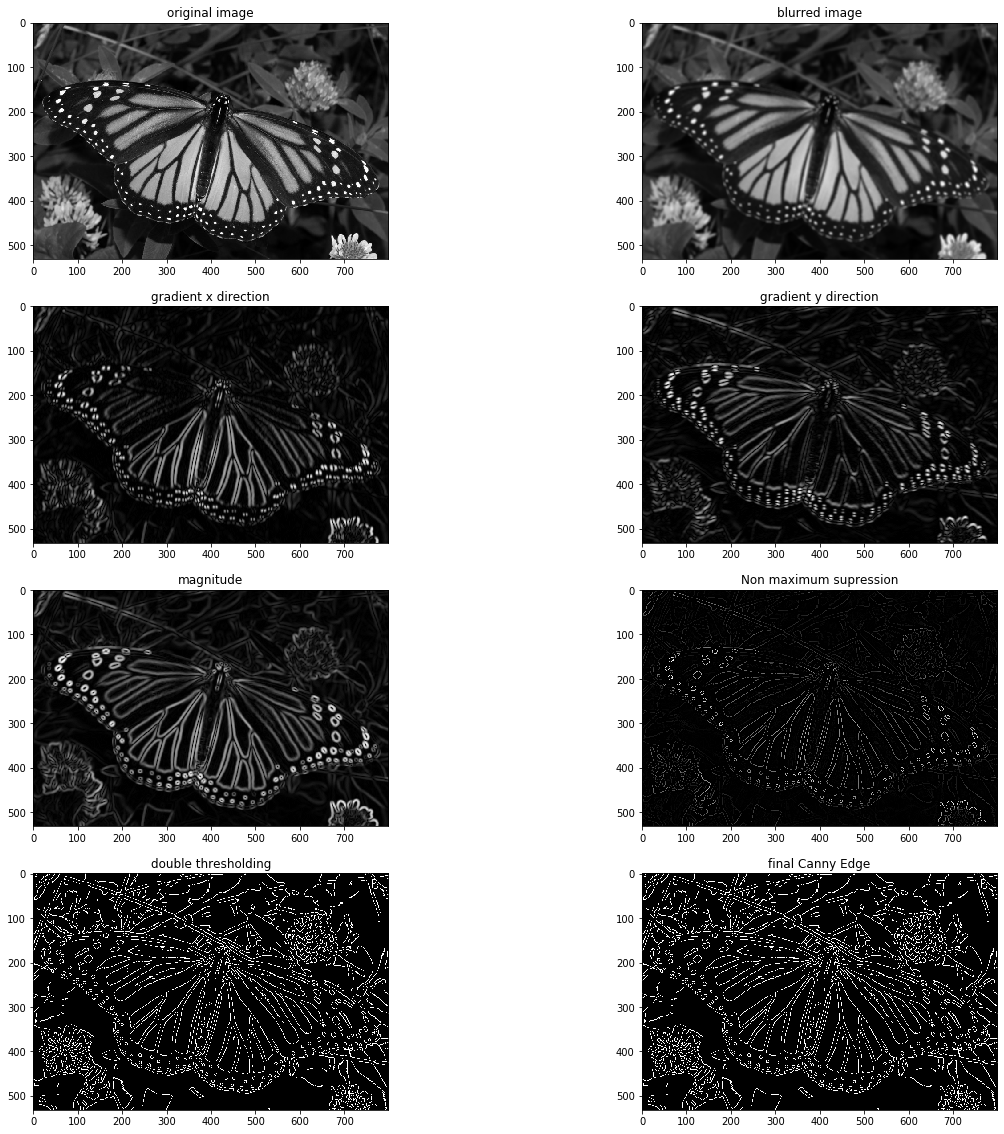

In [53]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.imshow(image_original,cmap='gray')
plt.title('original image')
plt.subplot(4,2,2)
plt.imshow(GaussianB,cmap='gray')
plt.title('blurred image')
plt.subplot(4,2,3)
plt.imshow(gx,cmap='gray')
plt.title('gradient x direction')
plt.subplot(4,2,4)
plt.imshow(gy,cmap='gray')
plt.title('gradient y direction')
plt.subplot(4,2,5)
plt.imshow(magnitude,cmap='gray')
plt.title('magnitude')
plt.subplot(4,2,6)
plt.imshow(NMS_method,cmap='gray')
plt.title('Non maximum supression')
plt.subplot(4,2,7)
plt.imshow(double_thresh,cmap='gray')
plt.title('double thresholding')
plt.subplot(4,2,8)
plt.imshow(finalcanny,cmap='gray')
plt.title('final Canny Edge')